In [1]:

pip install kagglehub


In [2]:
import kagglehub
import pandas as pd
import os

# Download dataset programmatically
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Dataset path:", path)


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Dataset path: /kaggle/input/heart-disease-dataset


In [3]:
# List files inside dataset
files = os.listdir(path)
print(files)

# Load CSV (usually heart.csv)
df = pd.read_csv(os.path.join(path, files[0]))

df.head()


['heart.csv']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.shape

(1025, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [14]:
X = df.drop(columns='target',axis=1) #axis=1 for columns and 0 for rows
Y = df['target']

In [16]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [17]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
#in this we are dividing these X and Y variable into X_train,X_test,Y_train-test  means in X_train data stored is the features are stored which are  used as training data and in test_size it shows that from the whole data how many persent of data we will be taking as testing data

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#accuracy on training data(x,y train)
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [23]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8524390243902439


In [24]:
#accuracy on testing data(x,y test)
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [25]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.8048780487804879


In [26]:
input_data=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)

 #convert above data into array using numpy
input_data_as_numpy_array=np.asarray(input_data)


 #reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
input_data1=(70,1,0,145,174,0,1,125,1,2.6,0,0,3)
input_data_as_numpy_array1=np.asarray(input_data1)
input_data_reshaped1=input_data_as_numpy_array1.reshape(1,-1)
prediction1=model.predict(input_data_reshaped1)
print(prediction1)

if(prediction1[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


RANDOM FOREST


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [32]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [33]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 1.0


In [34]:
#accuracy on testing data(x,y test)
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [35]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 1.0


In [56]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.7804878048780488


In [57]:
input_data1=(70,1,0,145,174,0,1,125,1,2.6,0,0,3)
input_data_as_numpy_array1=np.asarray(input_data1)
input_data_reshaped1=input_data_as_numpy_array1.reshape(1,-1)
prediction1=model.predict(input_data_reshaped1)
print(prediction1)

if(prediction1[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


KNN


In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [37]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [38]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9060975609756098


In [39]:
#accuracy on testing data(x,y test)
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [40]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.7219512195121951


In [41]:
input_data=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)

 #convert above data into array using numpy
input_data_as_numpy_array=np.asarray(input_data)


 #reshape the numpy array as we are predicting for only on instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting Algorithms(XGBoost)

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
#XGBoost

In [44]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [45]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 1.0


In [46]:
#accuracy on testing data(x,y test)
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [47]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 1.0


**Naive Bayes **

In [48]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [49]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [50]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8390243902439024


In [51]:
#accuracy on testing data(x,y test)
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [52]:
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.7804878048780488


In [53]:
#cross_validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.87317073 0.82926829 0.84390244 0.7902439  0.77073171]


In [54]:
#Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(Y_test, predictions))
print("Classification Report:\n", classification_report(Y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       100
           1       0.77      0.81      0.79       105

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205

ROC-AUC Score: 0.8828571428571429


In [55]:
input_data1=(70,1,0,145,174,0,1,125,1,2.6,0,0,3)
input_data_as_numpy_array1=np.asarray(input_data1)
input_data_reshaped1=input_data_as_numpy_array1.reshape(1,-1)
prediction1=model.predict(input_data_reshaped1)
print(prediction1)

if(prediction1[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[0]
The person does not have a heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


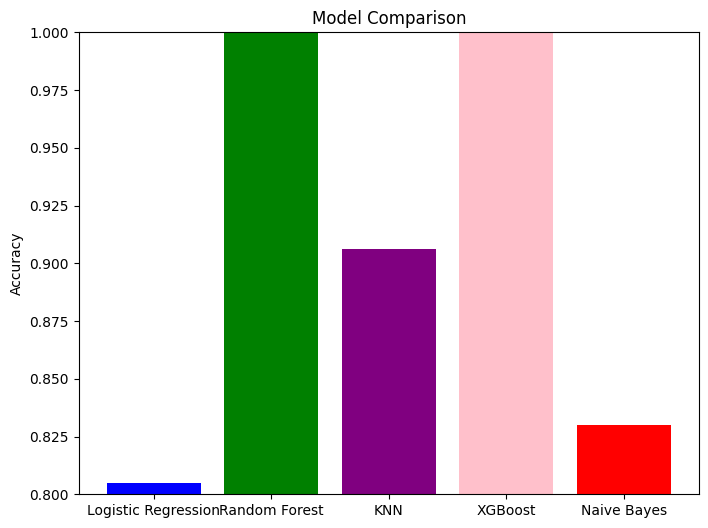

In [58]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'KNN','XGBoost','Naive Bayes']
accuracies = [0.8048, 1.0,0.90609, 1.0,0.83]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple','pink','red'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

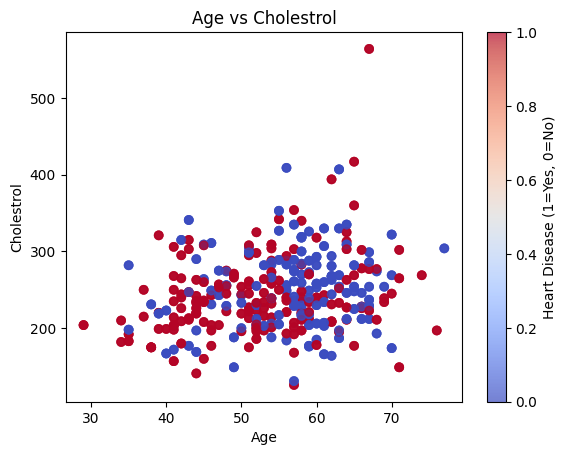

In [61]:
import pandas as pd
plt.scatter(df['age'], df['chol'], c=df['target'], cmap='coolwarm', alpha=0.7)
plt.title('Age vs Cholestrol')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.colorbar(label='Heart Disease (1=Yes, 0=No)')
plt.show()
#chol (cholesterol) vs age: High cholesterol levels combined with older age can indicate higher risk.

In [63]:
print(df.corr()['target'].sort_values(ascending=False))
#cp (chest pain type) = 0.434854: Strongest positive correlation. Higher chest pain types (e.g., typical angina) are strongly associated with heart disease.
#thalach (maximum heart rate achieved) = 0.422895: Higher max heart rate is correlated with heart disease.
#ca (number of major vessels) = -0.382085: Fewer major vessels are linked with heart disease.

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


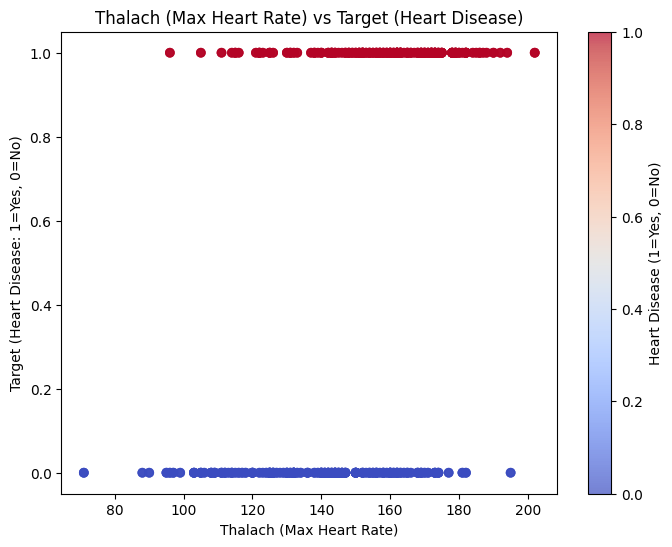

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

# Scatter plot for thalach vs target
plt.figure(figsize=(8, 6))
plt.scatter(df['thalach'], df['target'], c=df['target'], cmap='coolwarm', alpha=0.7)
plt.title('Thalach (Max Heart Rate) vs Target (Heart Disease)')
plt.xlabel('Thalach (Max Heart Rate)')
plt.ylabel('Target (Heart Disease: 1=Yes, 0=No)')
plt.colorbar(label='Heart Disease (1=Yes, 0=No)')
plt.show()

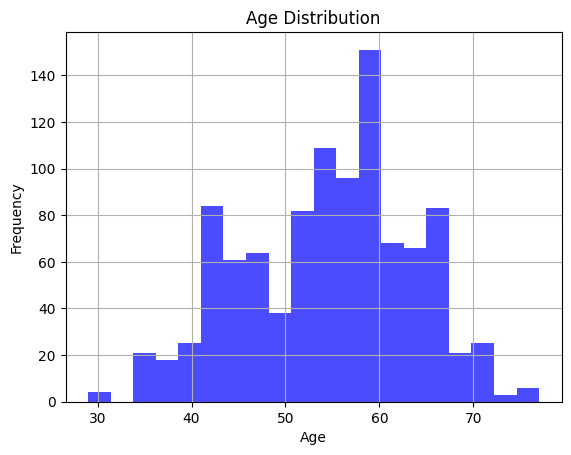

In [67]:
df['age'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-3552388483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='coolwarm')


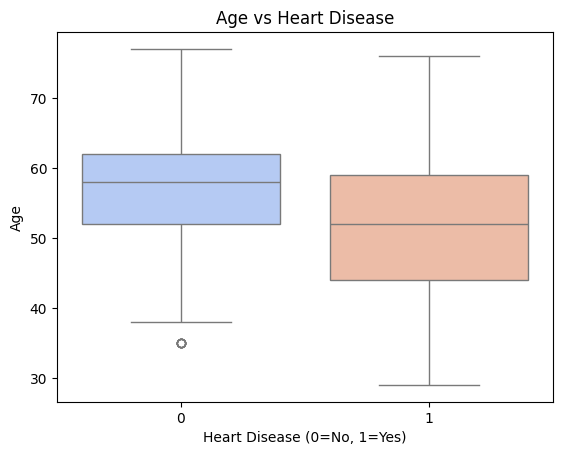

In [69]:
import seaborn as sns

sns.boxplot(x='target', y='age', data=df, palette='coolwarm')
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

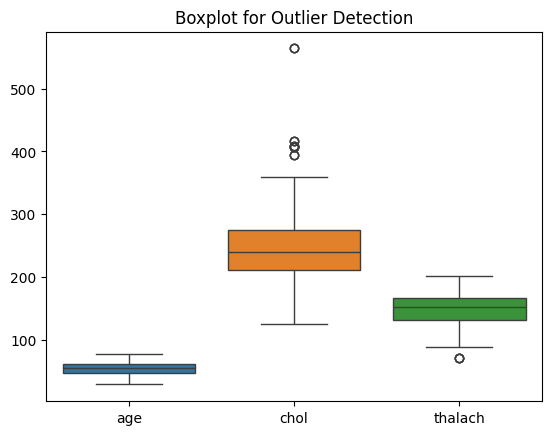

In [71]:
sns.boxplot(data=df[['age', 'chol', 'thalach']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [73]:
from scipy.stats import ttest_ind
group1 = df[df['target'] == 1]['chol']
group2 = df[df['target'] == 0]['chol']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -3.213433097179175, P-Value: 0.0013525712504626976


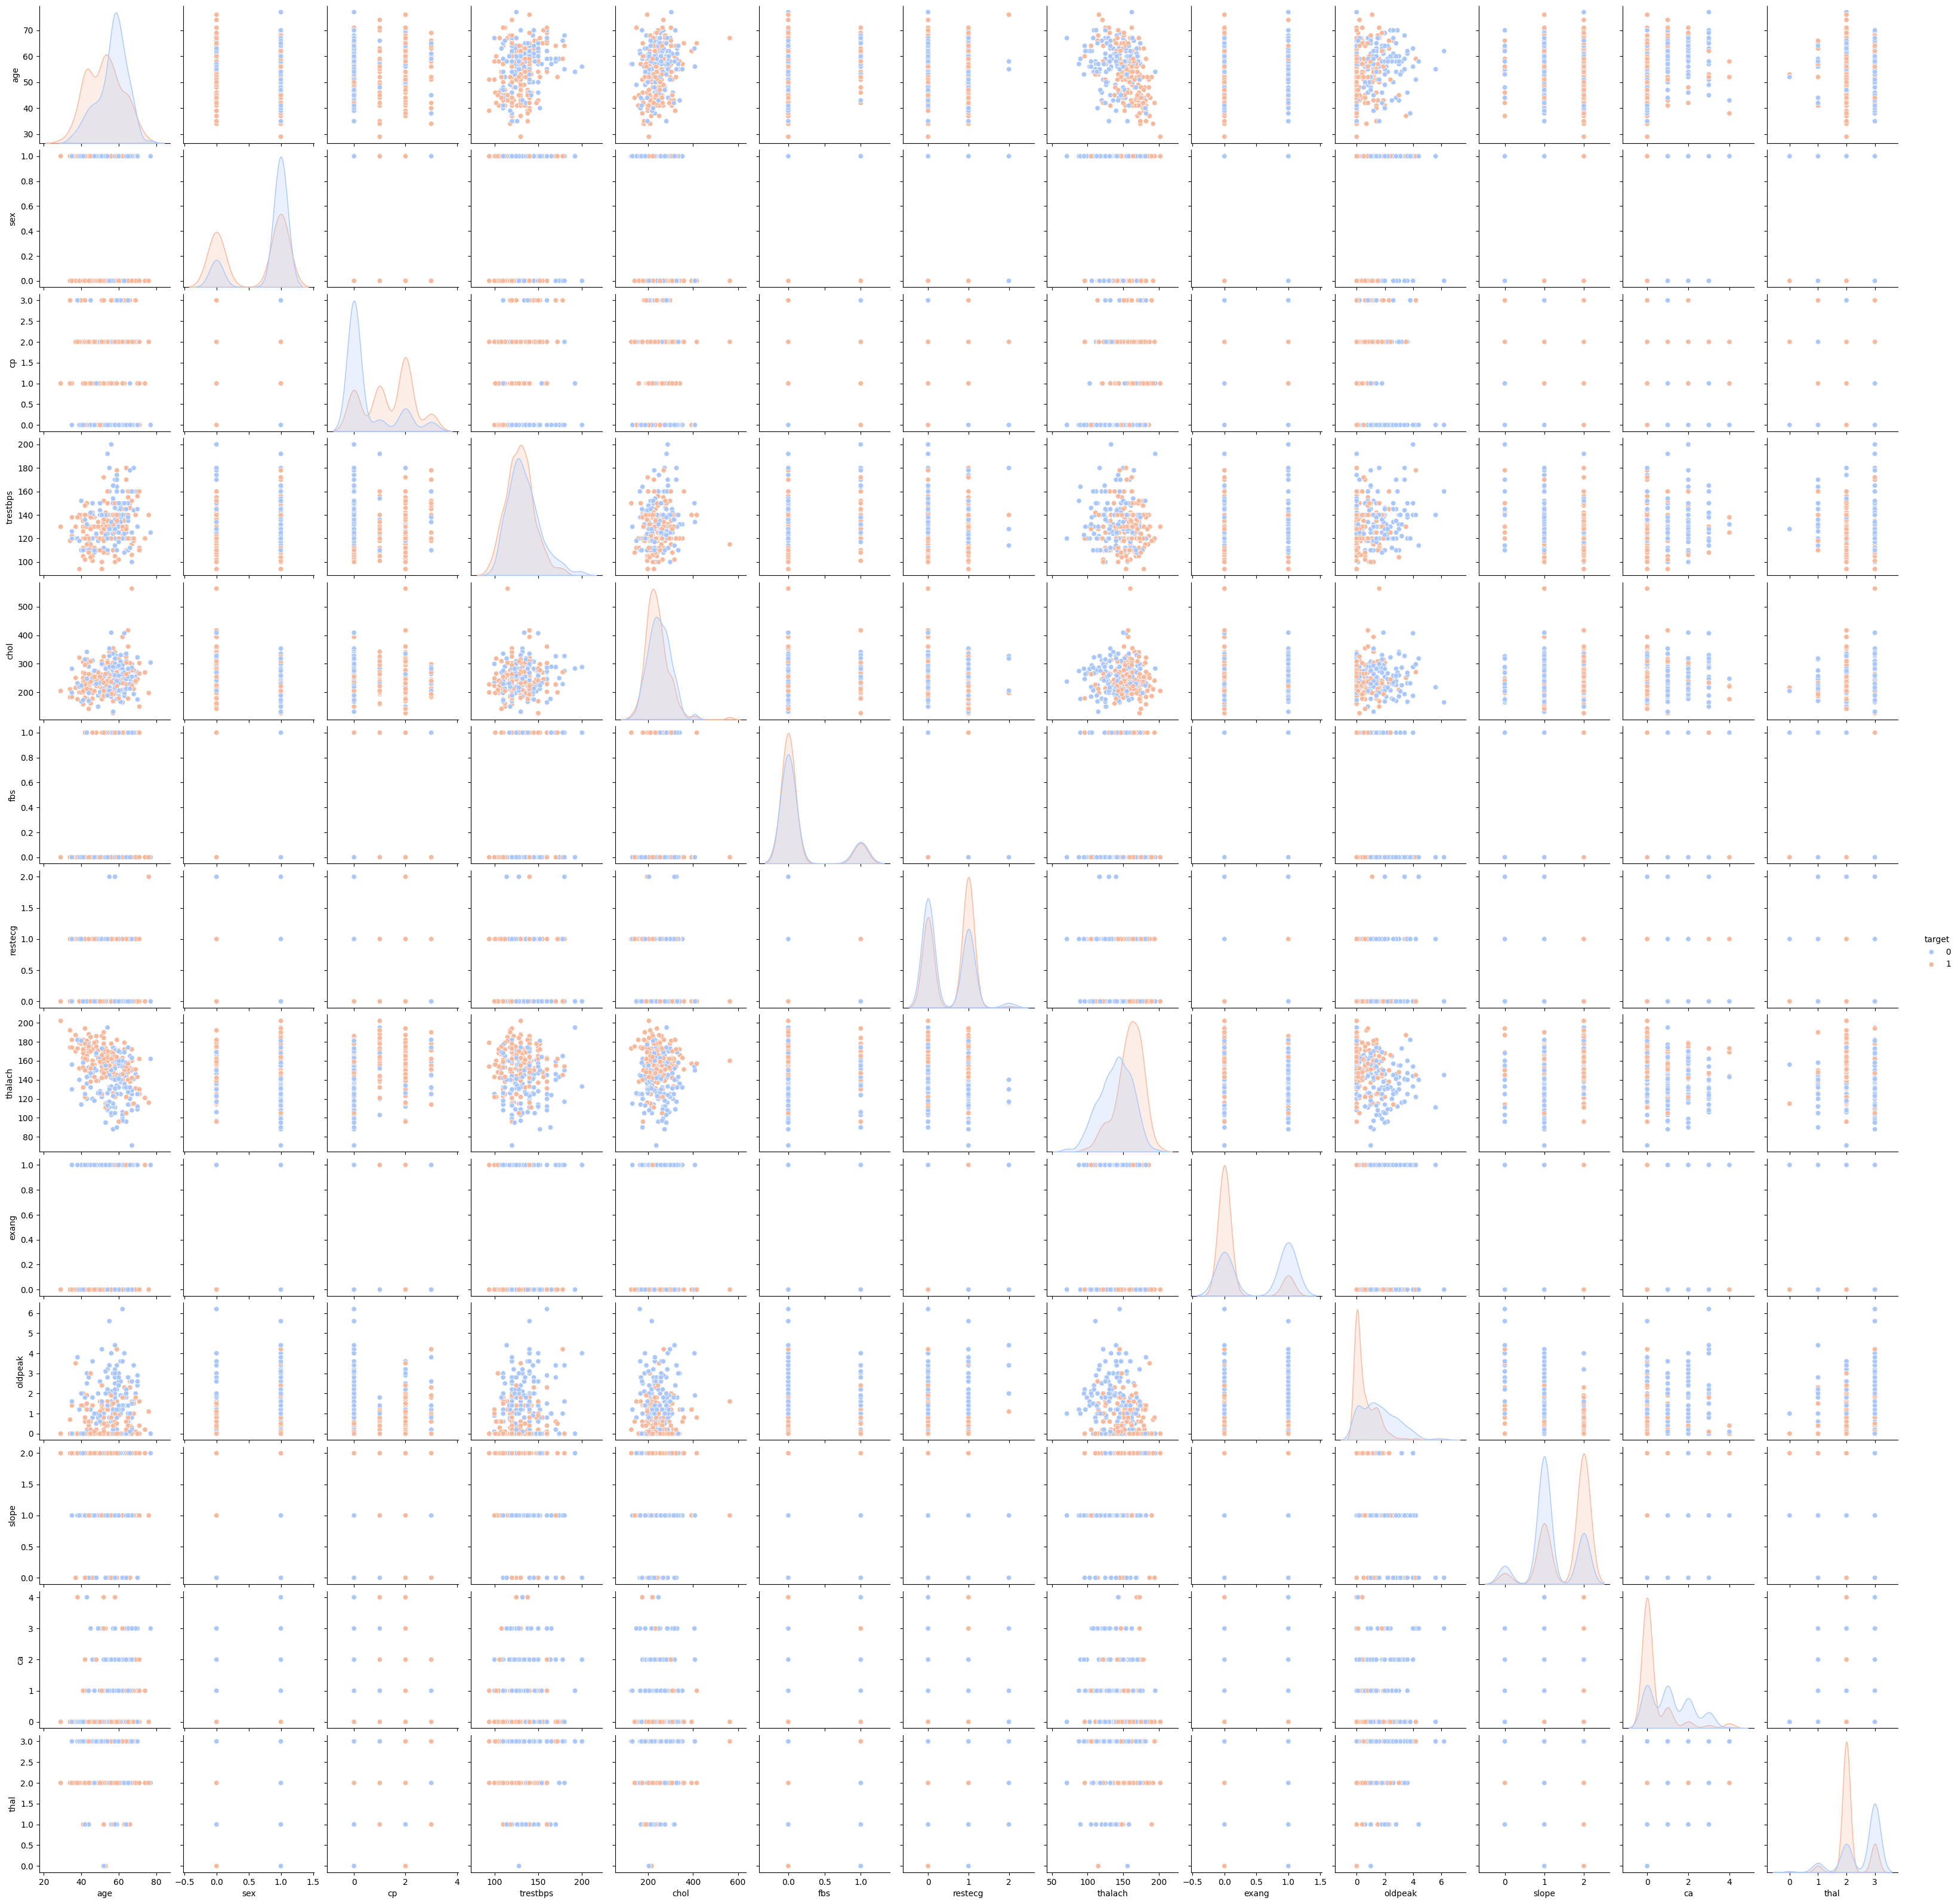

In [75]:
sns.pairplot(df, hue='target', palette='coolwarm')
plt.show()

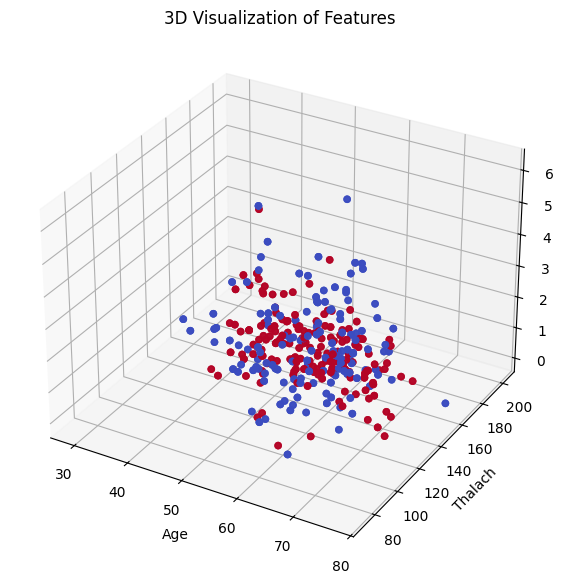

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['thalach'], df['oldpeak'], c=df['target'], cmap='coolwarm', alpha=0.7)
ax.set_xlabel('Age')
ax.set_ylabel('Thalach')
ax.set_zlabel('Oldpeak')
plt.title('3D Visualization of Features')
plt.show()

In [78]:
import joblib
joblib.dump(model, "heart.pkl")

['heart.pkl']